In [4]:
%load_ext autoreload
%autoreload 2

from spyglass.spikesorting.v0 import CuratedSpikeSorting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spyglass.common import interval_list_contains, PositionIntervalMap, TaskEpoch

import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from ms_opto_stim_protocol import OptoStimProtocol
from spyglass.common import convert_epoch_interval_name_to_position_interval_name

import matplotlib.pyplot as plt
import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from Analysis.spiking_analysis import smooth
from Analysis.position_analysis import get_running_intervals
from Analysis.utils import filter_opto_data, get_running_valid_intervals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# import os
# os.path.exists('./Plots/gm_20240227/')

True

# Open Loop

datasets: 2
linear_limits [10, 126.8923664781934]


[2024-04-09 15:16:43,220][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

linear_limits [10, 126.8923664781934]


[2024-04-09 15:17:13,424][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

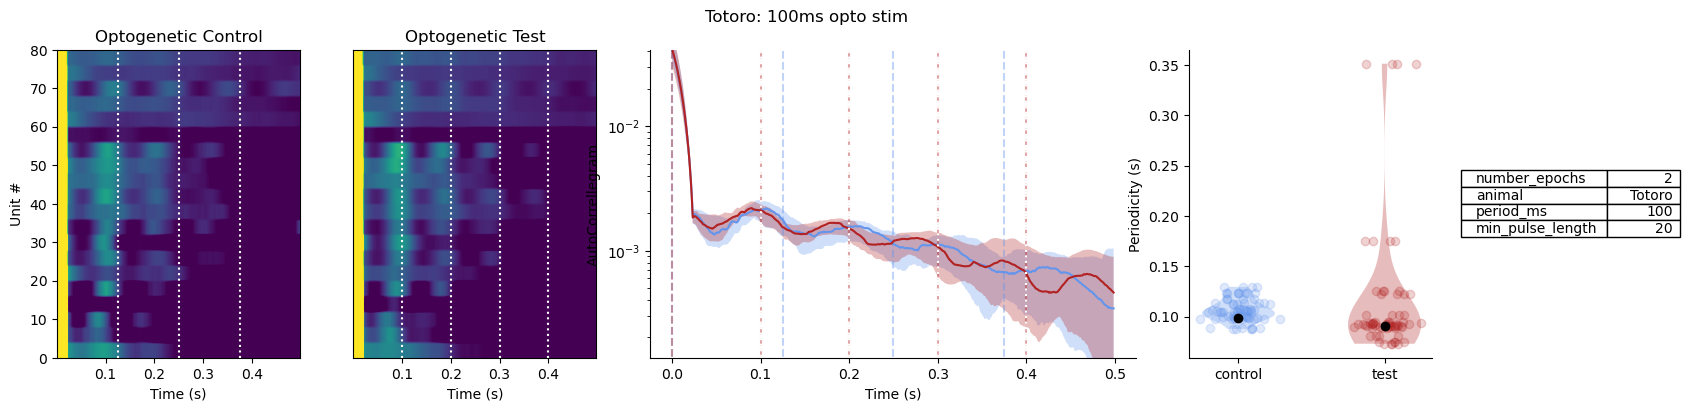

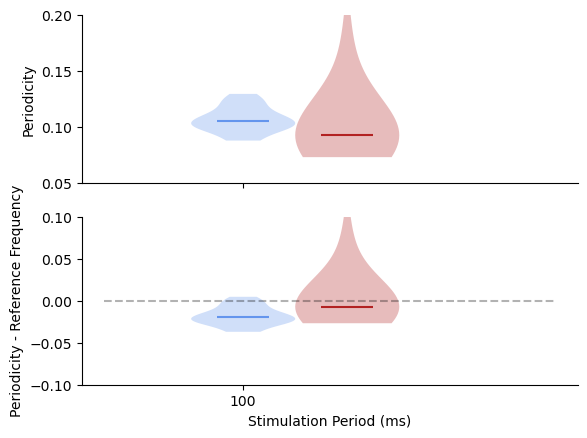

In [5]:
from Analysis.spiking_autocorrelegram import autocorrelegram,plot_periodicity_dependence
plt.rcParams['svg.fonttype'] = 'none'
period = 50
animal = "Totoro"
min_spikes = 300
periods = [250,165,125,100,80,50]
periods = [100]
periodicities = []
for period in periods:
    dataset_key = {"animal":animal,
                "period_ms":period,
                "min_pulse_length":20,
                #    "targeted_phase":90
                }
    fig, periodicity = autocorrelegram(dataset_key, return_periodicity_results=True)
    periodicities.append(periodicity)
    # fig.savefig(f"./Plots/gm_20240227/autocorrelogram_{animal}_{period}.svg")
    # fig.savefig(f"./Plots/gm_20240227/autocorrelogram_{animal}_{period}.pdf")
    
    break
fig_periodicity = plot_periodicity_dependence(periodicities, periods)
# fig_periodicity.savefig(f"./Plots/gm_20240227/autocorrelogram_periodicity_dependence_{animal}.svg")
# fig_periodicity.savefig(f"./Plots/gm_20240227/autocorrelogram_periodicity_dependence_{animal}.pdf")

# Closed Loop

datasets: 2
linear_limits [10, 126.8923664781934]


[2024-04-09 15:29:33,252][WARNING]: Skipped checksum for file with hash: 1fb4cf78-9ee6-df68-2734-4b3c6f0f8e42, and path: /stelmo/nwb/raw/Yoshi20220513_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

linear_limits [10, 126.8923664781934]


[2024-04-09 15:29:53,378][WARNING]: Skipped checksum for file with hash: 1fb4cf78-9ee6-df68-2734-4b3c6f0f8e42, and path: /stelmo/nwb/raw/Yoshi20220513_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


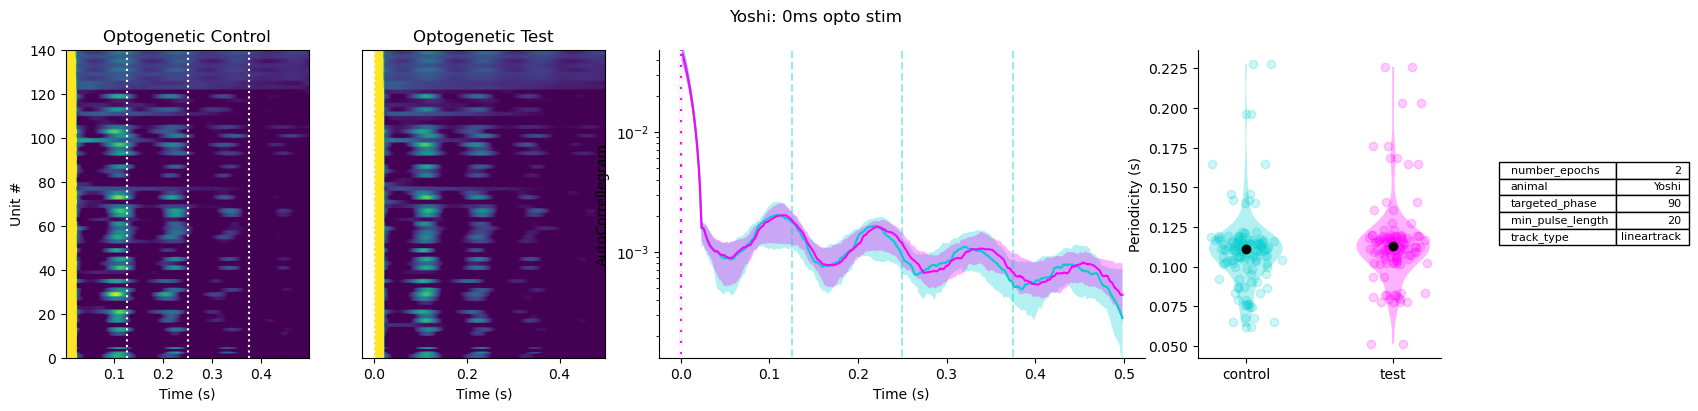

In [9]:
animal = "Yoshi"

dataset_key = {"animal":animal,
                "targeted_phase":90,
                "min_pulse_length":20,
                #    "targeted_phase":90
                "track_type":"lineartrack"
                }
fig, periodicity = autocorrelegram(dataset_key, return_periodicity_results=True)


